# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

The impact of ambient particular matters (PMs) to human health has become of practical interest in many fields of industrial consultancy. To address this ever-increasing environmental concern, this project focuses on two typical PMs with the sizes of 2.5$\mu$m (PM$_{2.5}$) and 10$\mu$m (PM$_{10}$), to investigate how the amibent PMs levels relate to the local water temperaure and humidity. The invesitgation is based on the montoring data from Sydney Water Temperature and Humidty 'https://data.penrith.city/api/explore/v2.1/catalog/datasets/sydney-water-temperature-and-humidity-30mn-aggregation-2022/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C' and New South Wales Air Quality Monitor Station (NSW AQMS) https://www.airquality.nsw.gov.au/air-quality-data-services/data-download-facility at Penrith Council area. 

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: .csv file (e.g., CSV File.)

Method: The data was programmatically downloaded via url link ('https://data.penrith.city/api/explore/v2.1/catalog/datasets/sydney-water-temperature-and-humidity-30mn-aggregation-2022/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C')

Dataset variables:

*   Time: the time that the data was collected by the device
*   Device name: the device that collected the data
*   Day Of Week: the day of week at the collecting time
*   Temperature ($^o$C): Measured instantaneous water temperature
*   Humidity (%): Measured instantaneous humidity
*   Geolocation: lattitude and longitude of the device location
*   LGA: Local government area

This dataset stored the monitored local water temperature and humidity in Penrith in 2022, which gives the two parameters of interest, water temperature and humidity. The dataset gives a valuable time granularity (30mins per record), which is comparable to the hourly PMs concentrations -- a widely used averaging period in enviromental industry.

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

#### The following code was initally active when programmatically downloading the raw data. To minimise the cost of time, the data is then stored locally.

In [2]:
# FILL IN 1st data gathering and loading method
url = 'https://data.penrith.city/api/explore/v2.1/catalog/datasets/sydney-water-temperature-and-humidity-30mn-aggregation-2022/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C'
df1 = pd.read_csv(url)


#### Save the original data locally so that I don't need to zone out waiting for it to be downloaded.

In [3]:
# df1.to_csv('sydney_water_temp_hum_v0.csv',index=False)

In [4]:
%ls

Data_Wrangling_Project_Starter.ipynb
cleaned_hourly_avg_pm_v2.csv
cleaned_merged_sydney_water_temp_hum_n_hourly_avg_pm_v3.csv
cleaned_sydney_water_temp_hum_v2.csv
hourly_avg_pm_v0.csv
hourly_avg_pm_v1.csv
sydney_water_temp_hum_v0.csv
sydney_water_temp_hum_v1.csv


#### Now I can load the orignal Dataset 1 locally, much faster.

In [5]:
# df1 = pd.read_csv('sydney_water_temp_hum_v0.csv',index_col=False)

In [6]:
df1.head(5)

,Time,Device name,Day Of Week,Temperature (°C),Humidity (%),Geolocation,LGA
0,2022-07-19T20:00:00+10:00,Caddens Oval - North-West,Tuesday,9.344149,96.539062,"-33.77534677981919, 150.7385496710238",Penrith City Council
1,2022-07-19T20:00:00+10:00,Irwin St - South,Tuesday,9.773153,95.074219,"-33.75283688697697, 150.7563883927052",Penrith City Council
2,2022-07-19T20:00:00+10:00,Water Gum Dr,Tuesday,9.656518,94.585938,"-33.725953, 150.72338253",Penrith City Council
3,2022-03-17T14:30:00+11:00,Parkes Av - Middle,Thursday,27.015088,65.777344,"-33.75351902695962, 150.7573530994433",Penrith City Council
4,2022-03-17T14:30:00+11:00,Eileen Cammack Res - NW,Thursday,28.290034,99.957031,"-33.775311802244, 150.6937540223574",Penrith City Council


#### As shown above, the data downloaded via the url has complicated column head names which makes calling the dataframe columns more difficult. To facilitate further data analysis, the column names are reformated and saved locally as follows.

In [7]:
# remove the brackets in the column names
df1.columns = df1.columns.str.replace(r'\([^)]*\)', '', regex=True)

In [8]:
# remove spaces at the head and tail of the name
df1.columns = df1.columns.str.strip()
# replace spaces in between with underscores
df1.columns = df1.columns.str.replace(' ','_')
# lower the letters
df1.columns = df1.columns.str.lower()
# check the column names
df1.columns

Index(['time', 'device_name', 'day_of_week', 'temperature', 'humidity',
       'geolocation', 'lga'],
      dtype='object')

#### Store the new-column-name Dataset 1 locally

In [9]:
# df1.to_csv('sydney_water_temp_hum_v1.csv')

In [10]:
%ls

Data_Wrangling_Project_Starter.ipynb
cleaned_hourly_avg_pm_v2.csv
cleaned_merged_sydney_water_temp_hum_n_hourly_avg_pm_v3.csv
cleaned_sydney_water_temp_hum_v2.csv
hourly_avg_pm_v0.csv
hourly_avg_pm_v1.csv
sydney_water_temp_hum_v0.csv
sydney_water_temp_hum_v1.csv


In [11]:
df1.sample(5)

,time,device_name,day_of_week,temperature,humidity,geolocation,lga
203663,2022-08-14T16:00:00+10:00,Northend Ave - North,Sunday,16.129114,53.326172,"-33.77390964665433, 150.6927279793041",Penrith City Council
63326,2022-06-29T22:30:00+10:00,Irwin St - South,Wednesday,9.257008,93.853516,"-33.75283688697697, 150.7563883927052",Penrith City Council
236336,2022-12-25T02:00:00+11:00,Northend Ave - North,Sunday,20.797213,81.158203,"-33.77390964665433, 150.6927279793041",Penrith City Council
48983,2022-08-22T15:30:00+10:00,Blackford Cres - Stokes,Monday,20.825366,40.386719,"-33.77758258, 150.692869",Penrith City Council
40274,2022-11-22T00:30:00+11:00,Badgerys Creek Road - paddock,Tuesday,11.529388,66.753906,"-33.8334001099992, 150.726370469997",Penrith City Council


#### Dataset 2

Type: .csv file (e.g., CSV File.)

Method: The data was manually downloaded via NSW AQMS website https://www.airquality.nsw.gov.au/air-quality-data-services/data-download-facility . The data was measured by NSW AQMS at Penrith council.

Dataset variables:

*   Date: Date of the measurement
*   Time: Hour of the measurement
*   PENRITH PM10 1h average [µg/m³]: Hourly averaged PM$_{10}$ levels in $\mu g$/$m^3$
*   PENRITH PM2.5 1h average [µg/m³]: Hourly averaged PM$_{2.5}$ levels in $\mu g$/$m^3$

This data of PMs concentrations is widely used in enviromental consultancy. Giving hourly average concetration, the data can compare with many other measurements with different time granularities.

In [12]:
%ls

Data_Wrangling_Project_Starter.ipynb
cleaned_hourly_avg_pm_v2.csv
cleaned_merged_sydney_water_temp_hum_n_hourly_avg_pm_v3.csv
cleaned_sydney_water_temp_hum_v2.csv
hourly_avg_pm_v0.csv
hourly_avg_pm_v1.csv
sydney_water_temp_hum_v0.csv
sydney_water_temp_hum_v1.csv


In [13]:
#FILL IN 2nd data gathering and loading method
df2 = pd.read_csv('hourly_avg_pm_v0.csv',encoding='latin1',header=2)

In [14]:
df2.head()

,Date,Time,PENRITH PM10 1h average [µg/m³],PENRITH PM2.5 1h average [µg/m³]
0,19/07/2022,01:00,10.2,5.5
1,19/07/2022,02:00,9.8,8.0
2,19/07/2022,03:00,8.6,10.8
3,19/07/2022,04:00,7.6,6.4
4,19/07/2022,05:00,8.4,8.6


#### Similar to Dataset 1, the column names need to be reformated for a more convient column/attribute calling

In [15]:
# since there are only four columns, we can set a list of new names directly to replace the old column names
new_col_names = ['date','time','pm_10','pm_25']
# replace the columns
df2.rename(columns = dict(zip(df2.columns.to_list(),new_col_names)),inplace=True)
df2.columns

Index(['date', 'time', 'pm_10', 'pm_25'], dtype='object')

In [16]:
df2.sample(5)

,date,time,pm_10,pm_25
2552,02/11/2022,09:00,8.8,18.3
1935,07/10/2022,16:00,7.3,2.5
132,24/07/2022,13:00,10.5,13.5
152,25/07/2022,09:00,11.4,NaN
842,23/08/2022,03:00,5.9,3.3


#### Now save the new-column-name Dataset 2 locally

In [17]:
# df2.to_csv('hourly_avg_pm_v1.csv',index=False)

In [18]:
%ls

Data_Wrangling_Project_Starter.ipynb
cleaned_hourly_avg_pm_v2.csv
cleaned_merged_sydney_water_temp_hum_n_hourly_avg_pm_v3.csv
cleaned_sydney_water_temp_hum_v2.csv
hourly_avg_pm_v0.csv
hourly_avg_pm_v1.csv
sydney_water_temp_hum_v0.csv
sydney_water_temp_hum_v1.csv


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1 - validity issue:

In [19]:
#FILL IN - Inspecting the dataframe visually
# Check all the columns
df1.columns

Index(['time', 'device_name', 'day_of_week', 'temperature', 'humidity',
       'geolocation', 'lga'],
      dtype='object')

In [20]:
# Firstly take a look at the data head
df1.head(5)

,time,device_name,day_of_week,temperature,humidity,geolocation,lga
0,2022-07-19T20:00:00+10:00,Caddens Oval - North-West,Tuesday,9.344149,96.539062,"-33.77534677981919, 150.7385496710238",Penrith City Council
1,2022-07-19T20:00:00+10:00,Irwin St - South,Tuesday,9.773153,95.074219,"-33.75283688697697, 150.7563883927052",Penrith City Council
2,2022-07-19T20:00:00+10:00,Water Gum Dr,Tuesday,9.656518,94.585938,"-33.725953, 150.72338253",Penrith City Council
3,2022-03-17T14:30:00+11:00,Parkes Av - Middle,Thursday,27.015088,65.777344,"-33.75351902695962, 150.7573530994433",Penrith City Council
4,2022-03-17T14:30:00+11:00,Eileen Cammack Res - NW,Thursday,28.290034,99.957031,"-33.775311802244, 150.6937540223574",Penrith City Council


In [21]:
# check if there are any null values
df1.isnull().sum().sum()

0

##### Now using .describe() to have a better understanding of the data range and some important statistical values.

In [22]:
df1.describe()

,temperature,humidity
count,281378.000000,281378.000000
mean,16.371200,75.953249
std,5.723310,19.084354
min,-2.992394,19.390625
25%,12.483922,60.650391
50%,16.351660,78.716797
75%,19.975402,93.365234
max,40.798179,99.957031


#### From the percentiles, the min and max are observed to be affected by the outlier temperatures. The value gaps between 25% and 75% are around 4 degrees per quartile, while the two tails (min and max) are far away from the quartile bounds. 

In [85]:
#FILL IN - Inspecting the dataframe programmatically
# The column names are correct.
df1.columns

Index(['time', 'device_name', 'day_of_week', 'temperature', 'humidity',
       'geolocation', 'lga'],
      dtype='object')

<AxesSubplot: title={'center': 'Boxplot of the temperature and humidity'}, ylabel='Temperature level, humidity level'>

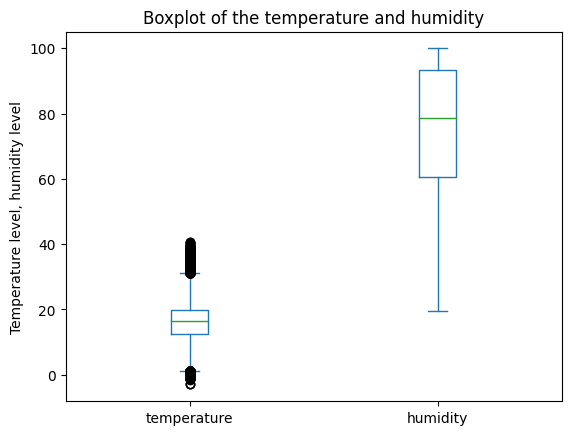

In [24]:
# Boxplots can directly show the outliers for multiple columns
df1[['temperature','humidity']].plot(kind='box', title='Boxplot of the temperature and humidity',
                                    ylabel='Temperature level, humidity level')

#### As we can see, there are outliers in the temperature values.

Now a histogram can completement to the boxplot on how the outliers are distributed in the dataset.

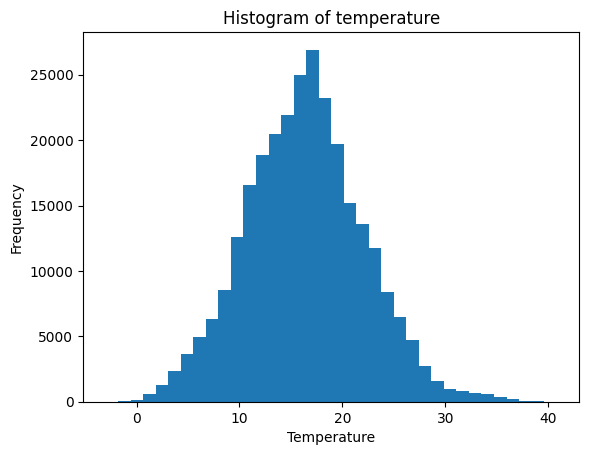

In [25]:
df1.temperature.plot(kind='hist',bins=36,title='Histogram of temperature',
                    xlabel='Temperature',ylabel='Frequency')
plt.xlabel('Temperature')
plt.show()

#### Based on the temperature histogram displayed above, the distribution of temperatures appears to resemble a normal distribution, with outliers present at both ends of the histogram. Extreme temperatures, such as those exceeding 30 degrees Celsius or falling below 0 degrees Celsius, are observed infrequently in the tails of the histogram. These extreme values may not have been anticipated and are potentially not representative of the data used for training purposes. However, the decision to exclude these outliers from the analysis remains debatable, despite their rare occurrence.

#### To sum up, outliers are found in Dataset 1 in temperature and humidity columns

### Quality Issue 2 - completeness and validity issues:

In [26]:
#FILL IN - Inspecting the dataframe visually
# firstly take a look at the raw data.

In [27]:
df2.sample(15)

,date,time,pm_10,pm_25
95,22/07/2022,24:00,6.3,2.7
2106,14/10/2022,19:00,10.8,2.0
677,16/08/2022,06:00,10.9,-3.3
603,13/08/2022,04:00,8.6,6.6
973,28/08/2022,14:00,9.4,7.7
1077,01/09/2022,22:00,27.1,12.2
2187,18/10/2022,04:00,22.7,5.8
667,15/08/2022,20:00,9.5,-1.0
988,29/08/2022,05:00,11.2,7.6
2250,20/10/2022,19:00,9.1,3.4


In [28]:
# check if there is any null values
df2.isnull().sum()

date      0
time      0
pm_10     8
pm_25    23
dtype: int64

There are null values in pm$_{2.5}$ and pm$_{10}$ in Dataset 2

In [29]:
#FILL IN - Inspecting the dataframe programmatically

In [30]:
# check the basic statistics
df2.describe()

,pm_10,pm_25
count,2776.000000,2761.000000
mean,11.995893,5.206193
std,7.040669,6.597011
min,-5.100000,-9.600000
25%,7.300000,1.300000
50%,10.800000,4.200000
75%,15.100000,8.100000
max,76.900000,41.800000


#### From the statistics above, negative PM concentration levels do not make sense. Additionally, the maximum value for both pm10 and pm2.5 far away from quartiles.

<AxesSubplot: title={'center': 'Boxplot of the pm_10 and pm_2.5 levels'}, ylabel='pm_10 and pm_2.5 levels'>

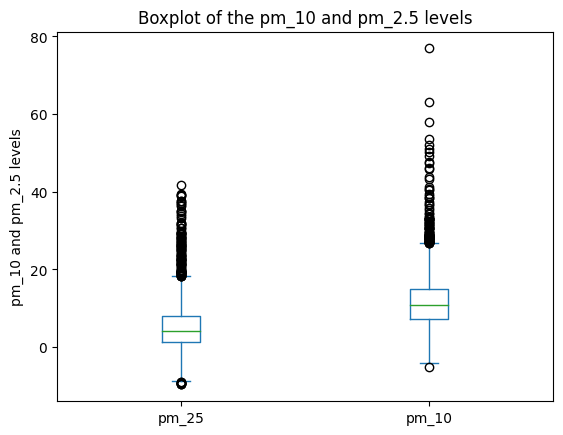

In [31]:
df2[['pm_25','pm_10']].plot(kind='box', title='Boxplot of the pm_10 and pm_2.5 levels',
                                    ylabel='pm_10 and pm_2.5 levels')

To completement to the boxplots, more information is provided using histograms.

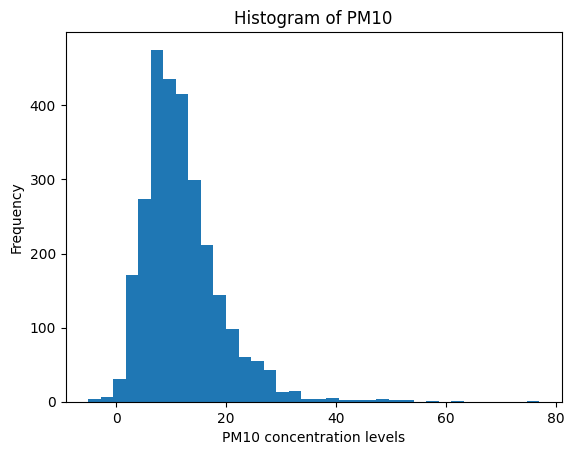

In [32]:
df2.pm_10.plot(kind='hist',bins=36,title='Histogram of PM10',
                    xlabel='PM10 concentration levels',ylabel='Occurrence')
plt.xlabel('PM10 concentration levels')
plt.show()

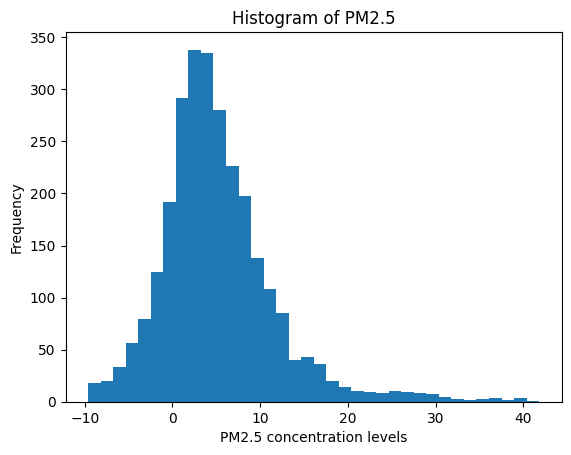

In [33]:
df2.pm_25.plot(kind='hist',bins=36,title='Histogram of PM2.5',
                    xlabel='PM2.5 concentration levels',ylabel='Occurrence')
plt.xlabel('PM2.5 concentration levels')
plt.show()

#### Based on the above boxplots and histograms for PM2.5 and PM10 concentrations, the outliers are at a rare occurrence. However, the left tails of PM2.5 still resemble a normal probability density even below zero value. It is anticipated that the PM2.5 distrbution was somehow shifted left due to some mechanical errors of the devices.

#### To sum up, there are three quality issues in Dataset 2,
* NA values in PM2.5 column
* PM concentrations are found below zero which are invalid
* Outliers in both PM2.5 and PM10 values

### Tidiness Issue 1:

In [34]:
#FILL IN - Inspecting the dataframe visually
df1.head(10)

,time,device_name,day_of_week,temperature,humidity,geolocation,lga
0,2022-07-19T20:00:00+10:00,Caddens Oval - North-West,Tuesday,9.344149,96.539062,"-33.77534677981919, 150.7385496710238",Penrith City Council
1,2022-07-19T20:00:00+10:00,Irwin St - South,Tuesday,9.773153,95.074219,"-33.75283688697697, 150.7563883927052",Penrith City Council
2,2022-07-19T20:00:00+10:00,Water Gum Dr,Tuesday,9.656518,94.585938,"-33.725953, 150.72338253",Penrith City Council
3,2022-03-17T14:30:00+11:00,Parkes Av - Middle,Thursday,27.015088,65.777344,"-33.75351902695962, 150.7573530994433",Penrith City Council
4,2022-03-17T14:30:00+11:00,Eileen Cammack Res - NW,Thursday,28.290034,99.957031,"-33.775311802244, 150.6937540223574",Penrith City Council
5,2022-07-19T20:00:00+10:00,Alinta Promenade,Tuesday,9.564014,95.562500,"-33.72551169401475, 150.731087757149",Penrith City Council
6,2022-03-17T14:30:00+11:00,Boundary Road - South,Thursday,27.932084,63.824219,"-33.7138, 150.7012",Penrith City Council
7,2022-07-19T20:00:00+10:00,Bakers Lane - East,Tuesday,9.066637,92.876953,"-33.8334001099992, 150.795536849997",Penrith City Council
8,2022-03-17T14:30:00+11:00,Northend Ave - North,Thursday,27.359632,65.289062,"-33.77390964665433, 150.6927279793041",Penrith City Council
9,2022-07-19T20:00:00+10:00,Cranebrook Reservoir - South West,Tuesday,9.368281,92.632812,"-33.7199386699992, 150.720158009997",Penrith City Council


#### There are several tidiness issues in Dataset 1
* The geolocation column contains both longitude and latitude numbers, which makes numerical calculation difficult in one column.
* The device names are not consistent. For example, the device Caddens Oval - North-West uses full words "North-West" for the location, while device Eileen Cammack Res - NW uses abbreviations instead.
* The time format is non-standard datetime format.
* There are multiple measurements by different devices at the same time, however, the humidity levels are inconsistent. For example at record 3 and 4, the humidity levels are 65.777344 and 99.957031, respectively. Considering an unique humidity value at each time, the multile humidity values need to be cleaned.

In [35]:
#FILL IN - Inspecting the dataframe programmatically
# check if there are any format issue
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281378 entries, 0 to 281377
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   time         281378 non-null  object 
 1   device_name  281378 non-null  object 
 2   day_of_week  281378 non-null  object 
 3   temperature  281378 non-null  float64
 4   humidity     281378 non-null  float64
 5   geolocation  281378 non-null  object 
 6   lga          281378 non-null  object 
dtypes: float64(2), object(5)
memory usage: 15.0+ MB


In [36]:
# time format is not standard, look into the time data
df1.time.unique()

array(['2022-07-19T20:00:00+10:00', '2022-03-17T14:30:00+11:00',
       '2022-03-17T14:00:00+11:00', ..., '2022-12-27T16:30:00+11:00',
       '2022-04-01T16:30:00+11:00', '2022-11-11T00:30:00+11:00'],
      dtype=object)

#### The time format is object but not standard datetime format, which needs to be cleaned.

### Tidiness Issue 2: 
* Date and time are separated into two columns
* Date and time are not in standard datetime format

In [37]:
#FILL IN - Inspecting the dataframe visually
df2.head()

,date,time,pm_10,pm_25
0,19/07/2022,01:00,10.2,5.5
1,19/07/2022,02:00,9.8,8.0
2,19/07/2022,03:00,8.6,10.8
3,19/07/2022,04:00,7.6,6.4
4,19/07/2022,05:00,8.4,8.6


#### Date and time are not necessarily to be stored in two columns, the two columns can be merged into one.

In [38]:
#FILL IN - Inspecting the dataframe programmatically
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2784 entries, 0 to 2783
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2784 non-null   object 
 1   time    2784 non-null   object 
 2   pm_10   2776 non-null   float64
 3   pm_25   2761 non-null   float64
dtypes: float64(2), object(2)
memory usage: 87.1+ KB


#### The Date and time formats are object which are non-standard datetime format. These columns need to be reformated.

#### To sum up, two tidiness issues are found in Dataset 2,
* Date and time are separated into two columns
* Date and time are not in standard datetime format

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [39]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
df1c,df2c = df1.copy(),df2.copy()

### **Quality Issue 1: outliers in Dataset 1**

#### To remove the outliers, values that are not in the range from $\mu - \sigma$ to $\mu + \sigma$ are excluded, where $\mu$ and $\sigma$ are the mean and standard deviation, respectively.

In [40]:
# FILL IN - Apply the cleaning strategy

In [41]:
# get the statistics of df1c
stat = df1c.describe().T

In [42]:
# get the temperature and humidity ranges using the mean and std
range_temperature = [stat.loc['temperature','mean'] - stat.loc['temperature','std'], stat.loc['temperature','mean'] + stat.loc['temperature','std']]
range_humidity = [stat.loc['humidity','mean'] - stat.loc['humidity','std'], stat.loc['humidity','mean'] + stat.loc['humidity','std']]

In [43]:
range_humidity

[56.868894982551495, 95.03760309898828]

In [44]:
# select the value in range to remove outliers
df1c = df1c[(df1c['temperature'] >= range_temperature[0]) &(df1c['temperature'] <= range_temperature[1])]
df1c.head()

,time,device_name,day_of_week,temperature,humidity,geolocation,lga
63,2022-07-19T18:00:00+10:00,Parkes Av - West,Tuesday,10.836278,90.923828,"-33.75586617358723, 150.7566024508745",Penrith City Council
74,2022-07-19T17:30:00+10:00,Boundary Road - South,Tuesday,11.070890,83.843750,"-33.7138, 150.7012",Penrith City Council
76,2022-07-19T17:30:00+10:00,Parkes Av - West,Tuesday,10.935486,89.214844,"-33.75586617358723, 150.7566024508745",Penrith City Council
81,2022-07-19T17:30:00+10:00,Bushland - Chapman St,Tuesday,11.027990,87.750000,"-33.7606475919, 150.753248686",Penrith City Council
82,2022-07-19T17:30:00+10:00,Blackford Cres - Stokes,Tuesday,10.821531,85.796875,"-33.77758258, 150.692869",Penrith City Council


In [45]:
df1c = df1c[(df1c['humidity'] >= range_humidity[0]) &(df1c['humidity'] <= range_humidity[1])]
df1c.head()

,time,device_name,day_of_week,temperature,humidity,geolocation,lga
63,2022-07-19T18:00:00+10:00,Parkes Av - West,Tuesday,10.836278,90.923828,"-33.75586617358723, 150.7566024508745",Penrith City Council
74,2022-07-19T17:30:00+10:00,Boundary Road - South,Tuesday,11.070890,83.843750,"-33.7138, 150.7012",Penrith City Council
76,2022-07-19T17:30:00+10:00,Parkes Av - West,Tuesday,10.935486,89.214844,"-33.75586617358723, 150.7566024508745",Penrith City Council
81,2022-07-19T17:30:00+10:00,Bushland - Chapman St,Tuesday,11.027990,87.750000,"-33.7606475919, 150.753248686",Penrith City Council
82,2022-07-19T17:30:00+10:00,Blackford Cres - Stokes,Tuesday,10.821531,85.796875,"-33.77758258, 150.692869",Penrith City Council


In [46]:
# Check if the cleaning was successful

In [47]:
df1c.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,117755.0,16.129540,3.078510,10.648589,13.59665,16.095598,18.628062,22.093609
humidity,117755.0,77.487367,10.936556,56.988281,68.21875,77.984375,87.261719,94.830078


#### The outliers in Dataset 1 are cleaned

### **Quality Issue 2:**
* NA values in PM2.5 column
* PM concentrations are found below zero which are invalid
* Outliers in both PM2.5 and PM10 values

#### Only 23 records are with NA values in PM2.5 and 8 records in PM10, it is not expected to have significant impacts on the data analysis after dropping the NA records

In [48]:
#FILL IN - Apply the cleaning strategy
# remove NA valuesa
df2c.dropna(axis=0,inplace=True)

In [49]:
# check if there are still null values
df2c.isnull().sum()

date     0
time     0
pm_10    0
pm_25    0
dtype: int64

In [50]:
# look into the stats
stat = df2c.describe().T
stat

,count,mean,std,min,25%,50%,75%,max
pm_10,2757.0,11.986398,7.002102,-5.1,7.3,10.8,15.1,76.9
pm_25,2757.0,5.209322,6.598328,-9.6,1.3,4.2,8.1,41.8


In [51]:
# set the range
range_pm_10 = [stat.loc['pm_10','mean'] - stat.loc['pm_10','std'], stat.loc['pm_10','mean'] + stat.loc['pm_10','std']]
range_pm_25 = [stat.loc['pm_25','mean'] - stat.loc['pm_25','std'], stat.loc['pm_25','mean'] + stat.loc['pm_25','std']]

In [52]:
# slice the dataframe
df2c = df2c[(df2c.pm_10 >= range_pm_10[0])&(df2c.pm_10 <= range_pm_10[1])]
df2c = df2c[(df2c.pm_25 >= range_pm_25[0])&(df2c.pm_25 <= range_pm_25[1])]

In [53]:
# remove the negative values
df2c = df2c.query('pm_10 >= 0').query('pm_25 >= 0')

In [54]:
df2c.head()

,date,time,pm_10,pm_25
0,19/07/2022,01:00,10.2,5.5
1,19/07/2022,02:00,9.8,8.0
2,19/07/2022,03:00,8.6,10.8
3,19/07/2022,04:00,7.6,6.4
4,19/07/2022,05:00,8.4,8.6


In [55]:
#Check if the cleaning was successful
df2c.describe().T

,count,mean,std,min,25%,50%,75%,max
pm_10,1503.0,11.086228,3.618059,5.0,8.0,10.9,13.8,18.9
pm_25,1503.0,4.867199,3.007549,0.0,2.4,4.4,7.1,11.8


#### Now the aforementioned quality issues are solved for Dataset 2

### **Tidiness Issue 1: There are several tidiness issues in Dataset 1**
* The geolocation column contains both longitude and latitude numbers, which makes numerical calculation difficult in one column.
* The device names are not consistent. For example, the device Caddens Oval - North-West uses full words "North-West" for the location, while device Eileen Cammack Res - NW uses abbreviations instead.
* The time format is non-standard datetime format.
* There are multiple measurements by different devices at the same time, however, the humidity levels are inconsistent. For example at record 3 and 4, the humidity levels are 65.777344 and 99.957031, respectively. Considering an unique humidity value at each time, the multile humidity values need to be cleaned.

#### The measurements are focused in Penrith suburb. The distantces between measurement points are negligible in an atmospheric scale. Therefore, the device names, geolocations and lga are redundant for this investigation.

In [56]:
# drop the redundant columns
df1c.drop(['device_name','geolocation','lga'],axis=1,inplace=True)
df1c.head()

,time,day_of_week,temperature,humidity
63,2022-07-19T18:00:00+10:00,Tuesday,10.836278,90.923828
74,2022-07-19T17:30:00+10:00,Tuesday,11.070890,83.843750
76,2022-07-19T17:30:00+10:00,Tuesday,10.935486,89.214844
81,2022-07-19T17:30:00+10:00,Tuesday,11.027990,87.750000
82,2022-07-19T17:30:00+10:00,Tuesday,10.821531,85.796875


#### Reformat the datetime in time column. The time difference is actually not necessary as both Dataset 1 and 2 are using Sydney time.

In [57]:
# remove time difference and replace T with white space
df1c.time = df1c.time.str.extract(r'(\d+-\d+-\d+T\d+:\d+:\d+)')
df1c.time = df1c.time.str.replace('T',' ')
df1c.head()

,time,day_of_week,temperature,humidity
63,2022-07-19 18:00:00,Tuesday,10.836278,90.923828
74,2022-07-19 17:30:00,Tuesday,11.070890,83.843750
76,2022-07-19 17:30:00,Tuesday,10.935486,89.214844
81,2022-07-19 17:30:00,Tuesday,11.027990,87.750000
82,2022-07-19 17:30:00,Tuesday,10.821531,85.796875


In [58]:
# reformat the time into standard datetime format
df1c.time = pd.to_datetime(df1c.time)
df1c.head()

,time,day_of_week,temperature,humidity
63,2022-07-19 18:00:00,Tuesday,10.836278,90.923828
74,2022-07-19 17:30:00,Tuesday,11.070890,83.843750
76,2022-07-19 17:30:00,Tuesday,10.935486,89.214844
81,2022-07-19 17:30:00,Tuesday,11.027990,87.750000
82,2022-07-19 17:30:00,Tuesday,10.821531,85.796875


In [59]:
# check the format
df1c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117755 entries, 63 to 281377
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   time         117755 non-null  datetime64[ns]
 1   day_of_week  117755 non-null  object        
 2   temperature  117755 non-null  float64       
 3   humidity     117755 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 4.5+ MB


#### The aforementioned tidiness issues are solved. However, since I have dropped some redundant columns, the records can be duplicated now.

In [60]:
# check the duplicated records
df1c.duplicated(subset=['time','temperature','humidity']).sum()

30

In [61]:
# check the duplicated record without subsets in case there are any inconsistent day_of_week
df1c.duplicated().sum()

30

#### It is good that day_of_week column doesn't show any inconsistency with the time column, but day_of_week is still redundant in this investigation. It can be very useful for further investigations like weekly PM concentrations.

### We cannot directly drop the duplicates. The duplicated measurements are valuable, so the value should be averaged.

In [62]:
df1c = df1c.groupby('time').agg('mean',numeric_only=True)

In [63]:
df1c.head()

,temperature,humidity
time,,
2022-03-11 18:30:00,22.024566,65.728516
2022-03-11 19:00:00,21.699194,67.828125
2022-03-11 19:30:00,21.325424,68.434168
2022-03-11 20:00:00,21.031467,69.732422
2022-03-11 20:30:00,20.847636,70.375326


In [64]:
# check the duplicates and nulls

In [65]:
df1c.duplicated().sum()

0

In [66]:
df1c.isnull().sum()

temperature    0
humidity       0
dtype: int64

#### Dataset 1 is now cleaned and ready for this study.

### **Tidiness Issue 2:**
* Date and time are separated into two columns
* Date and time are not in standard datetime format

In [67]:
# The date and time columns should be merged into time column to be consistent with Dataset 1
df2c['time_cp'] = df2c.time
df2c.drop('time',axis=1,inplace=True)
df2c.head()

,date,pm_10,pm_25,time_cp
0,19/07/2022,10.2,5.5,01:00
1,19/07/2022,9.8,8.0,02:00
2,19/07/2022,8.6,10.8,03:00
3,19/07/2022,7.6,6.4,04:00
4,19/07/2022,8.4,8.6,05:00


In [68]:
# check the hour range (it happened before, those stations never use standard hours....)
df2c.time_cp.unique()

array(['01:00', '02:00', '03:00', '04:00', '05:00', '07:00', '08:00',
       '09:00', '15:00', '06:00', '10:00', '11:00', '14:00', '16:00',
       '17:00', '18:00', '22:00', '23:00', '12:00', '13:00', '19:00',
       '20:00', '21:00', '24:00'], dtype=object)

#### The time values are from 01:00 to 24:00, not 00:00 to 23:00. Need to reformat

In [69]:
# replace 24:00 with 00:00
df2c.time_cp = df2c.time_cp.str.replace('24:00', '00:00')
df2c.time_cp.unique()

array(['01:00', '02:00', '03:00', '04:00', '05:00', '07:00', '08:00',
       '09:00', '15:00', '06:00', '10:00', '11:00', '14:00', '16:00',
       '17:00', '18:00', '22:00', '23:00', '12:00', '13:00', '19:00',
       '20:00', '21:00', '00:00'], dtype=object)

Now combine the date and time_cp columns into a new time column

In [70]:
df2c['time'] = df2c[['date','time_cp']].apply(' '.join, axis=1)
df2c.head()

,date,pm_10,pm_25,time_cp,time
0,19/07/2022,10.2,5.5,01:00,19/07/2022 01:00
1,19/07/2022,9.8,8.0,02:00,19/07/2022 02:00
2,19/07/2022,8.6,10.8,03:00,19/07/2022 03:00
3,19/07/2022,7.6,6.4,04:00,19/07/2022 04:00
4,19/07/2022,8.4,8.6,05:00,19/07/2022 05:00


In [71]:
# drop date and time_cp
df2c.drop(['date','time_cp'],axis=1,inplace=True)
df2c.head()

,pm_10,pm_25,time
0,10.2,5.5,19/07/2022 01:00
1,9.8,8.0,19/07/2022 02:00
2,8.6,10.8,19/07/2022 03:00
3,7.6,6.4,19/07/2022 04:00
4,8.4,8.6,19/07/2022 05:00


In [72]:
# shift the columns
df2c = df2c.iloc[:,np.r_[2,0:2]]
df2c.head()

,time,pm_10,pm_25
0,19/07/2022 01:00,10.2,5.5
1,19/07/2022 02:00,9.8,8.0
2,19/07/2022 03:00,8.6,10.8
3,19/07/2022 04:00,7.6,6.4
4,19/07/2022 05:00,8.4,8.6


In [73]:
# reformat the datetime
df2c.time = pd.to_datetime(df2c.time)
df2c.head()

,time,pm_10,pm_25
0,2022-07-19 01:00:00,10.2,5.5
1,2022-07-19 02:00:00,9.8,8.0
2,2022-07-19 03:00:00,8.6,10.8
3,2022-07-19 04:00:00,7.6,6.4
4,2022-07-19 05:00:00,8.4,8.6


In [74]:
# check the format
df2c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1503 entries, 0 to 2783
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    1503 non-null   datetime64[ns]
 1   pm_10   1503 non-null   float64       
 2   pm_25   1503 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 47.0 KB


In [75]:
# check the duplicates and nulls
df2c.duplicated().sum()

0

In [76]:
df2c.isnull().sum()

time     0
pm_10    0
pm_25    0
dtype: int64

#### Now Dataset 2 is cleaned and ready for the study

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps. 
The redundant columns were already cleaned and dropped in the previous steps. Now to merge the two data.

In [77]:
df_merged = df1c.merge(df2c, how='inner', on='time')
df_merged.head()

,time,temperature,humidity,pm_10,pm_25
0,2022-03-11 21:00:00,20.417238,72.264509,18.0,6.0
1,2022-03-11 22:00:00,19.905103,76.550049,15.1,8.0
2,2022-03-11 23:00:00,19.224961,80.440142,14.1,4.6
3,2022-04-08 07:00:00,17.154702,94.830078,11.3,2.4
4,2022-04-08 11:00:00,19.494784,92.388672,10.8,6.1


In [78]:
# check index in case of messy index
df_merged.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            754, 755, 756, 757, 758, 759, 760, 761, 762, 763],
           dtype='int64', length=764)

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [79]:
%ls

Data_Wrangling_Project_Starter.ipynb
cleaned_hourly_avg_pm_v2.csv
cleaned_merged_sydney_water_temp_hum_n_hourly_avg_pm_v3.csv
cleaned_sydney_water_temp_hum_v2.csv
hourly_avg_pm_v0.csv
hourly_avg_pm_v1.csv
sydney_water_temp_hum_v0.csv
sydney_water_temp_hum_v1.csv


In [80]:
#FILL IN - saving data
# df1c.to_csv('cleaned_sydney_water_temp_hum_v2.csv',index=False)
# df2c.to_csv('cleaned_hourly_avg_pm_v2.csv',index=False)

In [81]:
# df_merged.to_csv('cleaned_merged_sydney_water_temp_hum_n_hourly_avg_pm_v3.csv',index=False)

In [82]:
%ls

Data_Wrangling_Project_Starter.ipynb
cleaned_hourly_avg_pm_v2.csv
cleaned_merged_sydney_water_temp_hum_n_hourly_avg_pm_v3.csv
cleaned_sydney_water_temp_hum_v2.csv
hourly_avg_pm_v0.csv
hourly_avg_pm_v1.csv
sydney_water_temp_hum_v0.csv
sydney_water_temp_hum_v1.csv


## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* 
* Study on how the PMs are related to the water temperature.
* Study on how the PMs are related to the humidity.

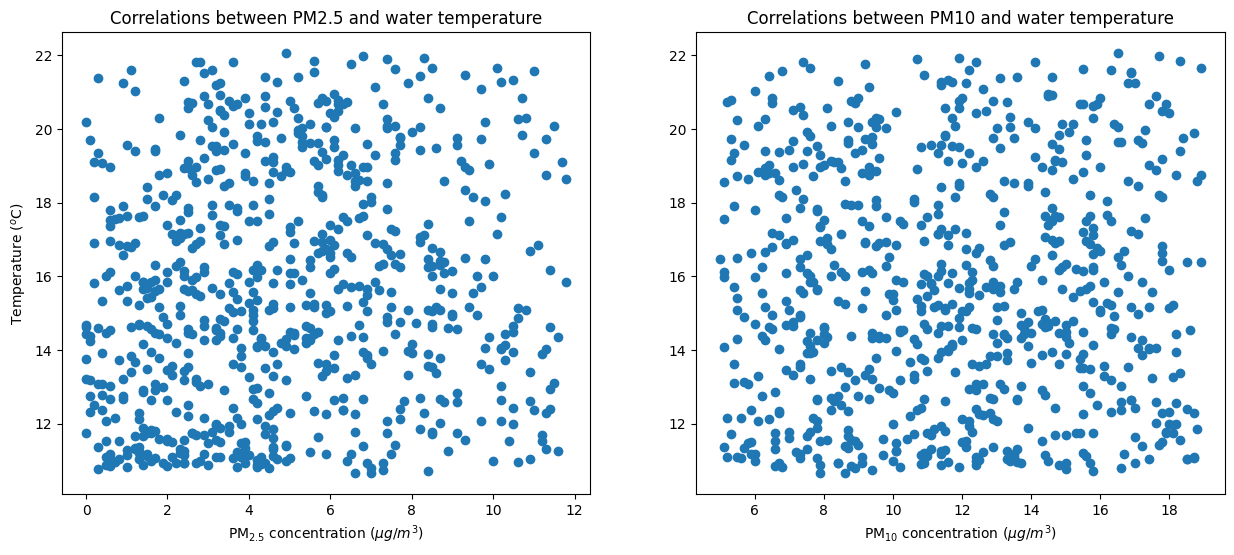

In [83]:
#Visual 1
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
ax1, ax2 = axes[0], axes[1]
ax1.scatter(df_merged.pm_25,df_merged.temperature)
ax2.scatter(df_merged.pm_10,df_merged.temperature)
ax1.set_title('Correlations between PM2.5 and water temperature')
ax2.set_title('Correlations between PM10 and water temperature')
ax1.set_ylabel(r'Temperature ($^o$C)')
ax1.set_xlabel('PM$_{2.5}$ concentration ($\mu g$/$m^3$)')
ax2.set_xlabel('PM$_{10}$ concentration ($\mu g$/$m^3$)')
plt.show()


*Answer to research question:* Well, PM$_{2.5}$ and PM$_{10}$ concentrations have not shown any observable correlations with the local water temperature. Further investigation need to be drawn to other physical dimensions.

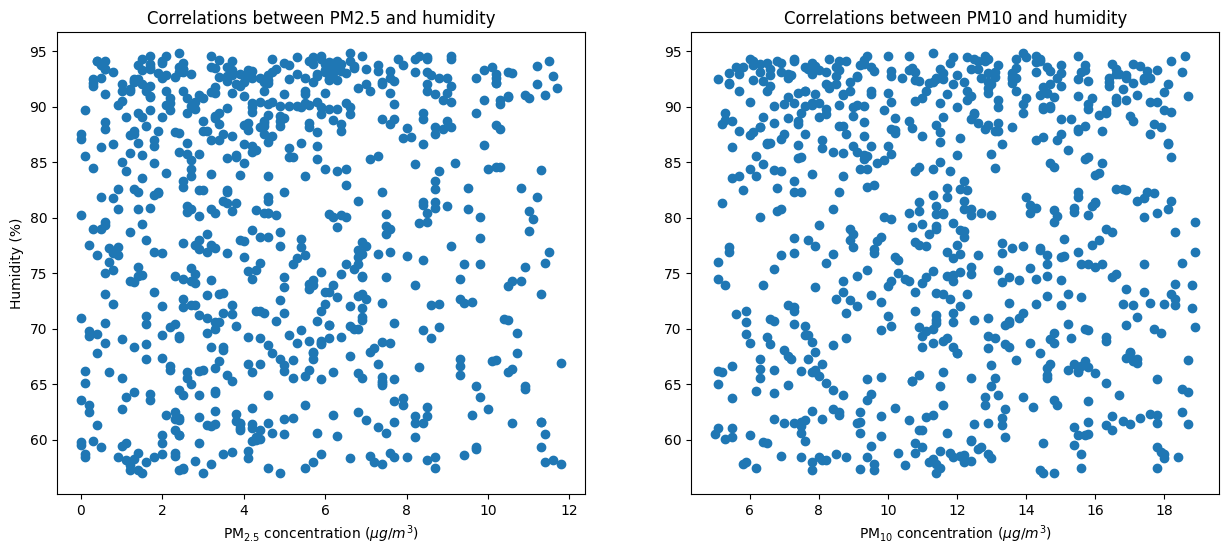

In [84]:
#Visual 2
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
ax1, ax2 = axes[0], axes[1]
ax1.scatter(df_merged.pm_25,df_merged.humidity)
ax2.scatter(df_merged.pm_10,df_merged.humidity)
ax1.set_title('Correlations between PM2.5 and humidity')
ax2.set_title('Correlations between PM10 and humidity')
ax1.set_ylabel(r'Humidity (%)')
ax1.set_xlabel('PM$_{2.5}$ concentration ($\mu g$/$m^3$)')
ax2.set_xlabel('PM$_{10}$ concentration ($\mu g$/$m^3$)')
plt.show()

*Answer to research question:* Similarly, both PM$_{2.5}$ and PM$_{10}$ concentrations have not shown any observable correlations with the local humidity. Further investigation need to be drawn to other physical dimensions.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* So far, correlations between PMs and water temperature and humidity are not observed. This can be affected by the limited averaging period of the PMs concentrations. Therefore, further investigation would increase the averaging period by grouping the same hours across all days together into a new hourly averaged dataset, in which case the concentrations are expected to be more converged by a larger averaging period.